In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
# Load iris dataset from sklearn
iris_data = load_iris()

# Convert to DataFrame
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Add target column for species
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

# Display first 5 rows
iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Features and Their Data Types
print(iris.dtypes)

# Separate features and their types
print("\nFeature Types:")
for col in iris.columns:
    dtype = iris[col].dtype
    if dtype == 'float64' or dtype == 'int64':
        print(f"{col}: Numeric")
    else:
        print(f"{col}: Nominal (Categorical)")


sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Feature Types:
sepal length (cm): Numeric
sepal width (cm): Numeric
petal length (cm): Numeric
petal width (cm): Numeric
species: Nominal (Categorical)


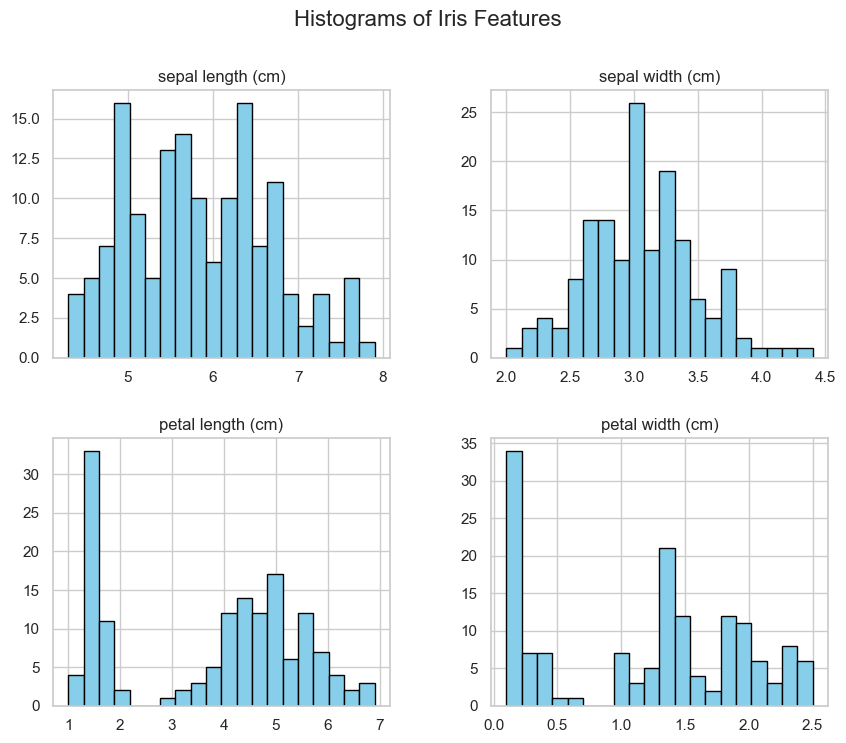

In [11]:
# Set plot style
sns.set(style="whitegrid")

# Plot histograms
iris.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Iris Features', fontsize=16)
plt.show()


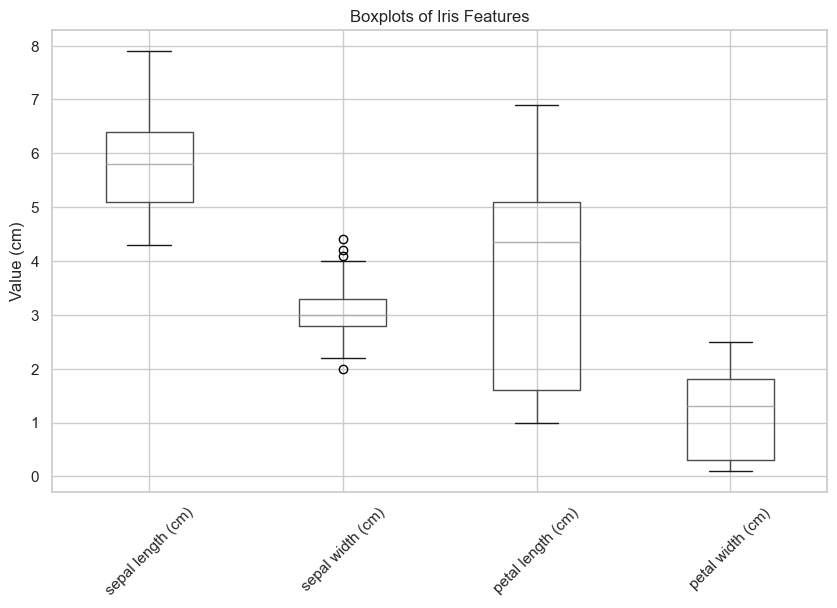

In [13]:
# Plot boxplots for each feature (excluding 'species')
plt.figure(figsize=(10, 6))
iris.drop('species', axis=1).boxplot()
plt.title('Boxplots of Iris Features')
plt.ylabel('Value (cm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [15]:
# Function to detect outliers using IQR
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index.tolist()
        outliers[column] = outlier_indices
    return outliers

# Call the function and display outliers
outlier_dict = detect_outliers(iris)

# Display summary of outliers
for feature, indices in outlier_dict.items():
    print(f"Feature '{feature}' has {len(indices)} outliers at indices: {indices}")


Feature 'sepal length (cm)' has 0 outliers at indices: []
Feature 'sepal width (cm)' has 4 outliers at indices: [15, 32, 33, 60]
Feature 'petal length (cm)' has 0 outliers at indices: []
Feature 'petal width (cm)' has 0 outliers at indices: []


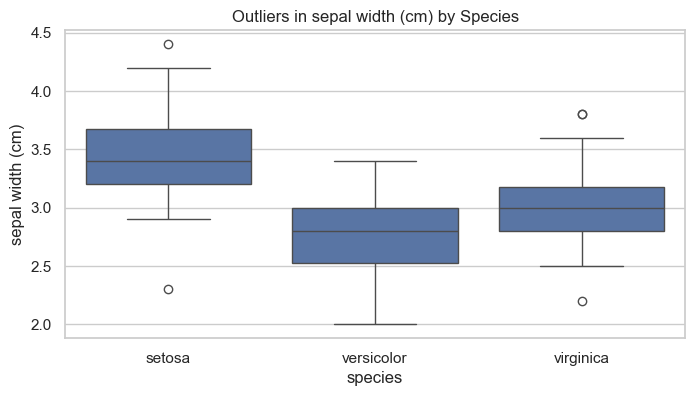

In [17]:
# Visualize one feature with outliers
feature = 'sepal width (cm)'

plt.figure(figsize=(8, 4))
sns.boxplot(data=iris, y=feature, x='species')
plt.title(f'Outliers in {feature} by Species')
plt.show()


In [ ]:
# Observations:
# 1. 'Sepal length' and 'petal length' are roughly normally distributed.
# 2. 'Sepal width' has a wider spread and shows a few outliers on the lower side.
# 3. 'Petal width' is skewed and may have mild outliers.
# 4. Outliers are clearly visible in 'sepal width (cm)' and 'petal width (cm)' via box plots.
# 5. No categorical features have outliers (only numeric ones can show this in box plots).
